In [1]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime,timedelta,timezone
import json
import matplotlib.dates as mdates

In [2]:
def CtoF(C):
    return 1.8*C + 32

In [3]:
def hPa2atm(hPa):
    return hPa/1013.2501

In [4]:
def ReadPTHData(filename,timezone):
    raw_data=[]
    with open(filename) as f:
        for line in f:
            l = line.split()
            if len(l)==2 :
                continue
            utc_time = datetime.utcfromtimestamp(float(l[0])/1000)
            tz_time = utc_time + timezone
            pth_data = json.loads(l[-1])
            pth_data['datetime'] = tz_time
            raw_data.append(pth_data)
            
    return raw_data

In [5]:
def StackData(raw_data):
    data={}
    for i in range(len(raw_data)):
        for key in raw_data[i].keys():
            try:
                data[key].append(raw_data[i][key])
            except KeyError:
                data[key]=[]
                data[key].append(raw_data[i][key])
    return data

In [6]:
def PlotPTHData(data):
    plt.rcParams['font.size'] = 15
    plt.rcParams['font.family'] = "serif"
    plt.rcParams['font.serif'] = 'Martel Sans'
    plt.rcParams['font.weight'] = 'normal'
    plt.rcParams['axes.labelweight'] = 'normal'
    plt.rcParams['axes.titleweight'] = 'normal'
    plt.rcParams['figure.titleweight'] = 'normal'

    fig, axs = plt.subplots(3, 1, sharex=True,figsize=(12,8))

    axs[0].set_xlim((data['datetime'][0].date(),data['datetime'][0].date()+timedelta(hours=24)))
    fig.subplots_adjust(hspace=0.2)
    bbox_props = dict(boxstyle="round4", fc="cyan", ec="b", lw=2)

    title_date = data['datetime'][0].strftime('%b %d, %Y')

    axs[0].set_title(title_date,fontsize=24)

    l1, = axs[0].plot(data['datetime'],[CtoF(el) for el in data['temperature']], marker='.',color='C0',label='Temperature',linestyle='none')

    axs[0].set_ylabel('Temperature [F]')
    axs[0].set_ylim(65,85)
    axs[0].get_yaxis().set_label_coords(-0.1,0.5)
    axs[0].grid()

    l2, = axs[1].plot(data['datetime'],[hPa2atm(el) for el in data['pressure']], marker='.',color='C1',label='Pressure',linestyle='none')
    axs[1].set_ylabel('Pressure [atm]')
    axs[1].set_ylim(0.96,1.01)
    axs[1].get_yaxis().set_label_coords(-0.1,0.5)
    axs[1].grid()

    l3, = axs[2].plot(data['datetime'],data['humidity'], marker='.',color='C2',label='Humidity',linestyle='none')
    axs[2].set_ylabel('Humidity [%]')
    axs[2].set_ylim(0,50)
    axs[2].get_yaxis().set_label_coords(-0.1,0.5)
    axs[2].get_xaxis().set_major_formatter(mdates.DateFormatter('%-I:%M %p'))
    axs[2].grid()


    def annotate_high_low(ax,high,low,unit):
        ann_x = 0.5
        ann_y = 0.13

        ax.annotate("High: "+"{0:.2f}".format(CtoF(max(data['temperature'])))+" ["+unit+"]     Low: "+"{0:.2f}".format(CtoF(min(data['temperature'])))+" ["+unit+"]",fontsize=12,
                    fontweight='normal',
                    xy=(ann_x, ann_y), xycoords='axes fraction',
                    xytext=(ann_x, ann_y), textcoords='axes fraction',
                    size=12, va="center", ha="center",
                    bbox=dict(boxstyle="square", fc="w"))

    annotate_high_low(axs[0],CtoF(max(data['temperature'])),CtoF(min(data['temperature'])),'F')
    annotate_high_low(axs[1],hPa2atm(max(data['pressure'])),hPa2atm(min(data['pressure'])),'atm')
    annotate_high_low(axs[2],max(data['humidity']),min(data['humidity']),'%')

    plt.setp(axs[2].get_xticklabels(), rotation=30)

    #plt.figlegend((l1,l2,l3), ('Temperature','Pressure','Humidity'), loc=(0.28,0.9),ncol=3, fancybox=True)
    plt.show()

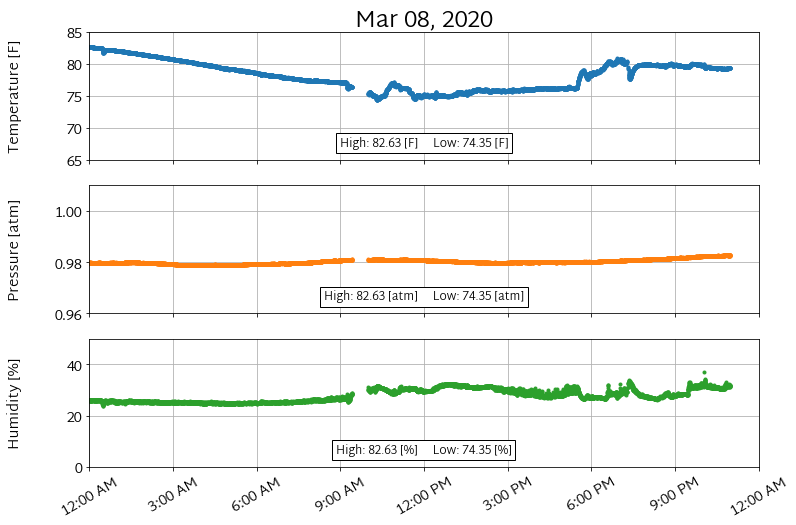

In [7]:
date='2020_03_08'
filename = './'+date+'_PTH_DATA.txt'
PST_offset = -timedelta(hours=8)

raw_data = ReadPTHData(filename,PST_offset)
data = StackData(raw_data)
PlotPTHData(data)